In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('../data/train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nMissing values:\n", missing)


Missing values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [6]:
# Print data types of columns with missing values
print("\nData types of columns with missing values:\n", df[missing.index].dtypes)


Data types of columns with missing values:
 PoolQC           object
MiscFeature      object
Alley            object
Fence            object
MasVnrType       object
FireplaceQu      object
LotFrontage     float64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
BsmtFinType2     object
BsmtExposure     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
Electrical       object
dtype: object


There are a lot of missing values. A quick inspection of the dataset shows that the majority of these variables are categorical where a particular feature is not present. A great way to handle these is to label these categories as None.

In [7]:
# Replace NaN with "None" in all categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df[cat_cols] = df[cat_cols].fillna("None")

For numerical columns, we will investigate the underlying distribution and interpret the meaning behind these values before deciding how to handle these.

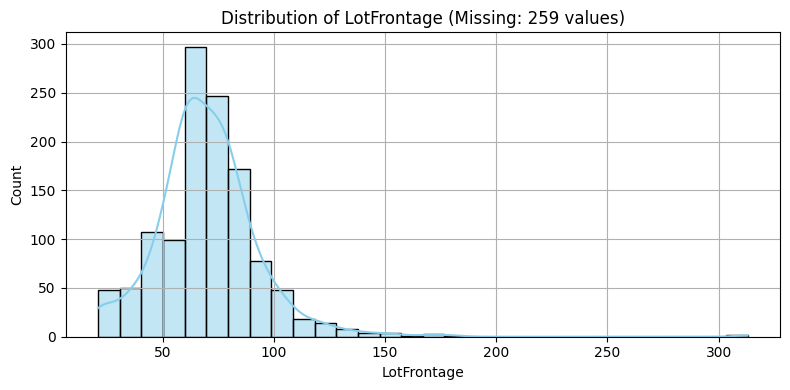

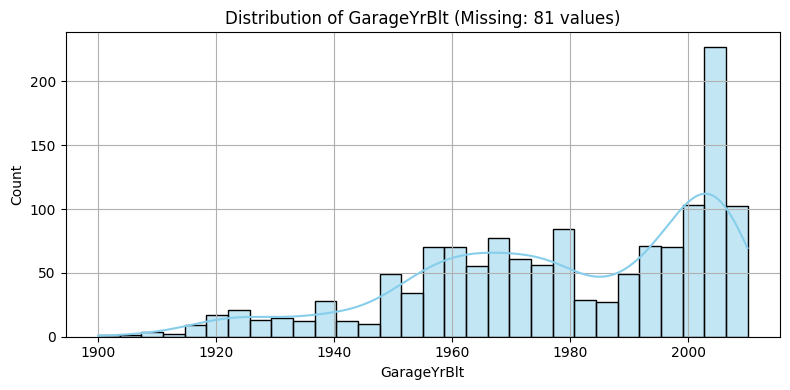

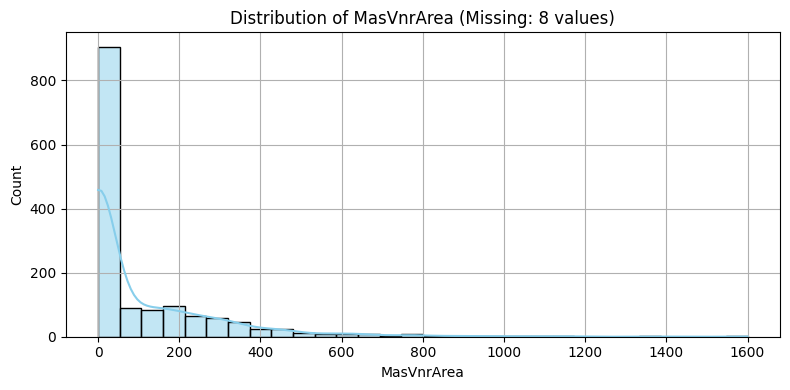

In [8]:
num_missing_cols = df[missing.index].select_dtypes(include=['number']).columns

# Plot distributions
for col in num_missing_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col} (Missing: {df[col].isnull().sum()} values)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Garage year built have missing values due to some houses lacking garages. Binning GarageYrBlt simplifies the variable by grouping similar garage ages into broader categories, making patterns easier to capture and interpret. This approach is especially useful when handling missing values, as you can assign a clear bin like "NoGarage" rather than imputing a potentially misleading year. It also reduces model complexity and guards against overfitting from too many unique years.

The MasVanArea corresponds with the MasVanType, and all NA values for the area corresponds with all NA values for the type. We assume NA to be the absence of the feature, so this would imply an area of 0.

Lot frontage will heavily depend on other predictor variables such as neighborhood. To estimate this, we will use Random Forest Regression. We will not include the target variable to avoid data leakage, as it introduces information from the outcome into the predictors.